<a href="https://colab.research.google.com/github/PaoPla/Valores-Atipicos/blob/main/Valores_at%C3%ADpicos_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [261]:
#Carga desde un archivo .csv sin indice
gyc20 = pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name = '2020', index_col = 2, header = 5)
gyc21 = pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name = '2021', index_col = 2, header = 3)
gyc22 = pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name = '2022', index_col = 2, header = 3)
gyc23 = pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name = '2023', index_col = 2, header = 3)

# **2020**

In [262]:
#Verificamos información del DataFrame
gyc20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3342 entries, BD20F436-72CC-4BE2-AD37-5999D71AA391 to F18225D6-4024-4F03-A15A-D18917386D59
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   RFC          3342 non-null   object        
 3   PROVEEDOR    3342 non-null   object        
 4   TIPO GASTO   3342 non-null   object        
 5   GASTO        840 non-null    object        
 6   DESCRIPCION  3342 non-null   object        
 7   TC           2951 non-null   float64       
 8   IMPORTE      3308 non-null   float64       
 9   IVA          3074 non-null   float64       
 10  RET ISR      3342 non-null   float64       
 11  RET IVA      3342 non-null   float64       
 12  TOTAL MX     3342 non-null   float64       
 13  TOTAL SAT    3342 non-null   float64       
 14  TIPO         3341 non-null   object       

In [263]:
gyc20['IMPORTE'] = gyc20['IMPORTE'].astype(float)
gyc21['IMPORTE'] = gyc21['IMPORTE'].astype(float)
gyc22['Importe'] = gyc22['Importe'].astype(float)
gyc23['Importe'] = gyc23['Importe'].astype(float)

In [264]:
#Corroboramos valores nulos
valores_nulos=gyc20.isnull().sum()
valores_nulos

FECHA             0
FOLIO           189
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2502
DESCRIPCION       0
TC              391
IMPORTE          34
IVA             268
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              1
STATUS            0
POLIZA         3321
Columna1          0
dtype: int64

##**PROCEDIMIENTO PARA ELIMINAR VALORES NULOS EN DATAFRAME**

In [265]:
#Realizamos una copia del dataframe
data1=gyc20.copy()
data1[["FOLIO", "GASTO", "POLIZA"]]= data1[["FOLIO", "GASTO", "POLIZA"]].fillna("--")

In [266]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

FECHA            0
FOLIO            0
RFC              0
PROVEEDOR        0
TIPO GASTO       0
GASTO            0
DESCRIPCION      0
TC             391
IMPORTE         34
IVA            268
RET ISR          0
RET IVA          0
TOTAL MX         0
TOTAL SAT        0
TIPO             1
STATUS           0
POLIZA           0
Columna1         0
dtype: int64

In [267]:
#Reemplazamos valores nulos del dataframe con "mean"
data1['IVA']=data1['IVA'].fillna(round(data1['IVA'].mean(),1))
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

FECHA            0
FOLIO            0
RFC              0
PROVEEDOR        0
TIPO GASTO       0
GASTO            0
DESCRIPCION      0
TC             391
IMPORTE         34
IVA              0
RET ISR          0
RET IVA          0
TOTAL MX         0
TOTAL SAT        0
TIPO             1
STATUS           0
POLIZA           0
Columna1         0
dtype: int64

In [268]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1['TC']=data1['TC'].fillna(method="bfill") 
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

FECHA           0
FOLIO           0
RFC             0
PROVEEDOR       0
TIPO GASTO      0
GASTO           0
DESCRIPCION     0
TC              0
IMPORTE        34
IVA             0
RET ISR         0
RET IVA         0
TOTAL MX        0
TOTAL SAT       0
TIPO            1
STATUS          0
POLIZA          0
Columna1        0
dtype: int64

In [269]:
data1["IMPORTE"]= data1["IMPORTE"].fillna(0) 

In [270]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
GASTO          0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           1
STATUS         0
POLIZA         0
Columna1       0
dtype: int64

##**SEPARAMOS CUALITATIVAS Y CUANTITATIVAS**

In [271]:
data1.columns

Index(['FECHA', 'FOLIO', 'RFC', 'PROVEEDOR', 'TIPO GASTO', 'GASTO',
       'DESCRIPCION', 'TC', 'IMPORTE', 'IVA', 'RET ISR', 'RET IVA', 'TOTAL MX',
       'TOTAL SAT', 'TIPO', 'STATUS', 'POLIZA', 'Columna1'],
      dtype='object')

In [272]:
gyc20_cuali = data1.drop(['IMPORTE', 'IVA', 'RET ISR', 'RET IVA', 'TOTAL MX','TOTAL SAT'], axis=1)
gyc20_cuan = data1.drop(['FECHA','FECHA', 'FOLIO', 'RFC', 'PROVEEDOR', 'TIPO GASTO','GASTO','DESCRIPCION','TC','TIPO', 'STATUS', 'POLIZA'], axis=1)

In [273]:
gyc20_cuan

,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
UUID,,,,,,,
BD20F436-72CC-4BE2-AD37-5999D71AA391,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
85AEAC2E-6395-44A0-9CB9-754D06893375,490.00,78.40,0.0,0.0,568.40,568.40,0.00
BD0DFE85-D776-41CB-9C5C-4FA7923E687A,195.00,31.20,0.0,0.0,226.20,226.20,0.00
EF4504D6-830D-415C-AF03-80CF54C5E28E,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,0.00,519.80,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...
80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,129.79,20.21,0.0,0.0,150.00,150.00,0.00
D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,163.79,26.21,0.0,0.0,190.00,190.00,0.00


<Figure size 1500x800 with 0 Axes>

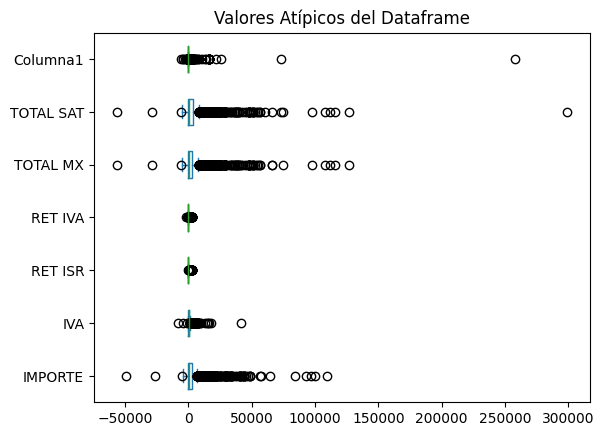

In [274]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gyc20_cuan.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

###**2020"DESVIACIÓN ESTÁNDAR"**

In [275]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=gyc20_cuan
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido IMPORTE      25156.362379
IVA           4563.165637
RET ISR        667.271992
RET IVA        958.239955
TOTAL MX     28488.002843
TOTAL SAT    33250.398514
Columna1     14626.999268
dtype: float64
Limite inferior permitido IMPORTE     -18921.747418
IVA          -3523.520012
RET ISR       -627.750813
RET IVA       -839.215179
TOTAL MX    -21455.655297
TOTAL SAT   -25762.462834
Columna1    -14171.411134
dtype: float64


In [276]:
#Encontramos Ouliers del Dataframe
outliers= gyc20_cuan[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
UUID,,,,,,,
BD20F436-72CC-4BE2-AD37-5999D71AA391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85AEAC2E-6395-44A0-9CB9-754D06893375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BD0DFE85-D776-41CB-9C5C-4FA7923E687A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EF4504D6-830D-415C-AF03-80CF54C5E28E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
gyc20_cuan_std= gyc20_cuan[(y<=Limite_Superior)&(y>=Limite_Inferior)]
gyc20_cuan_std

,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
UUID,,,,,,,
BD20F436-72CC-4BE2-AD37-5999D71AA391,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
85AEAC2E-6395-44A0-9CB9-754D06893375,490.00,78.40,0.0,0.0,568.40,568.40,0.00
BD0DFE85-D776-41CB-9C5C-4FA7923E687A,195.00,31.20,0.0,0.0,226.20,226.20,0.00
EF4504D6-830D-415C-AF03-80CF54C5E28E,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,0.00,519.80,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...
80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,129.79,20.21,0.0,0.0,150.00,150.00,0.00
D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,163.79,26.21,0.0,0.0,190.00,190.00,0.00


In [278]:
#Eliminamos columnas innecesarias
gyc20_cuan_std= gyc20_cuan_std.drop(['Columna1'], axis=1)
gyc20_cuan_std

,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,
BD20F436-72CC-4BE2-AD37-5999D71AA391,0.00,2248.28,0.0,0.0,2248.28,16300.00
85AEAC2E-6395-44A0-9CB9-754D06893375,490.00,78.40,0.0,0.0,568.40,568.40
BD0DFE85-D776-41CB-9C5C-4FA7923E687A,195.00,31.20,0.0,0.0,226.20,226.20
EF4504D6-830D-415C-AF03-80CF54C5E28E,10694.25,1711.08,0.0,0.0,12405.33,12405.33
EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,0.00,519.80,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...
80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,129.79,20.21,0.0,0.0,150.00,150.00
D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,2284.80,365.57,0.0,0.0,2650.37,2650.37
FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,163.79,26.21,0.0,0.0,190.00,190.00


In [279]:
#Corroboramos valores nulos del dataframe4
valores_nulos=gyc20_cuan_std.isnull().sum()
valores_nulos

IMPORTE      67
IVA          58
RET ISR      21
RET IVA      74
TOTAL MX     65
TOTAL SAT    45
dtype: int64

In [280]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_gyc20_cuan=gyc20_cuan_std.copy()
data_clean_gyc20_cuan=data_clean_gyc20_cuan.fillna(0) 
data_clean_gyc20_cuan

,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,
BD20F436-72CC-4BE2-AD37-5999D71AA391,0.00,2248.28,0.0,0.0,2248.28,16300.00
85AEAC2E-6395-44A0-9CB9-754D06893375,490.00,78.40,0.0,0.0,568.40,568.40
BD0DFE85-D776-41CB-9C5C-4FA7923E687A,195.00,31.20,0.0,0.0,226.20,226.20
EF4504D6-830D-415C-AF03-80CF54C5E28E,10694.25,1711.08,0.0,0.0,12405.33,12405.33
EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,0.00,519.80,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...
80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,129.79,20.21,0.0,0.0,150.00,150.00
D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,2284.80,365.57,0.0,0.0,2650.37,2650.37
FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,163.79,26.21,0.0,0.0,190.00,190.00


In [281]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean_gyc20_cuan.isnull().sum()
valores_nulos

IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

###**2020 "CUANTILES"**

In [282]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=gyc20_cuan

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido IMPORTE      6957.48500
IVA          1280.63375
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX     7983.17750
TOTAL SAT    8269.28375
Columna1        0.00000
dtype: float64
Limite inferior permitido IMPORTE     -4174.47500
IVA          -748.25625
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX    -4783.14250
TOTAL SAT   -4832.96625
Columna1        0.00000
dtype: float64


In [283]:
#Encontramos Outliers del Dataframe
outliers_iqr= gyc20_cuan[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
UUID,,,,,,,
BD20F436-72CC-4BE2-AD37-5999D71AA391,NaN,2248.28,NaN,NaN,NaN,16300.00,14051.72
85AEAC2E-6395-44A0-9CB9-754D06893375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BD0DFE85-D776-41CB-9C5C-4FA7923E687A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EF4504D6-830D-415C-AF03-80CF54C5E28E,10694.25,1711.08,NaN,NaN,12405.33,12405.33,NaN
EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
#Obtenemos datos limpios del Dataframe
gyc20_cuan_iqr= gyc20_cuan[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
gyc20_cuan_iqr

,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
UUID,,,,,,,
BD20F436-72CC-4BE2-AD37-5999D71AA391,0.00,NaN,0.0,0.0,2248.28,NaN,NaN
85AEAC2E-6395-44A0-9CB9-754D06893375,490.00,78.40,0.0,0.0,568.40,568.40,0.0
BD0DFE85-D776-41CB-9C5C-4FA7923E687A,195.00,31.20,0.0,0.0,226.20,226.20,0.0
EF4504D6-830D-415C-AF03-80CF54C5E28E,NaN,NaN,0.0,0.0,NaN,NaN,0.0
EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,0.00,519.80,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...
80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,129.79,20.21,0.0,0.0,150.00,150.00,0.0
D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.0
FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,163.79,26.21,0.0,0.0,190.00,190.00,0.0


In [285]:
#Eliminamos columnas innecesarias
gyc20_cuan_iqr= gyc20_cuan_iqr.drop(['Columna1'], axis=1)
gyc20_cuan_iqr

,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,
BD20F436-72CC-4BE2-AD37-5999D71AA391,0.00,NaN,0.0,0.0,2248.28,NaN
85AEAC2E-6395-44A0-9CB9-754D06893375,490.00,78.40,0.0,0.0,568.40,568.40
BD0DFE85-D776-41CB-9C5C-4FA7923E687A,195.00,31.20,0.0,0.0,226.20,226.20
EF4504D6-830D-415C-AF03-80CF54C5E28E,NaN,NaN,0.0,0.0,NaN,NaN
EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,0.00,519.80,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...
80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,129.79,20.21,0.0,0.0,150.00,150.00
D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,2284.80,365.57,0.0,0.0,2650.37,2650.37
FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,163.79,26.21,0.0,0.0,190.00,190.00


In [286]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=gyc20_cuan_iqr.isnull().sum()
valores_nulos

IMPORTE      423
IVA          347
RET ISR       45
RET IVA      253
TOTAL MX     420
TOTAL SAT    426
dtype: int64

In [287]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
gyc20_cuan_iqr_clean=gyc20_cuan_iqr.copy()
gyc20_cuan_iqr_clean=gyc20_cuan_iqr_clean.fillna(0) 
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=gyc20_cuan_iqr_clean.isnull().sum()
valores_nulos

IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

###**DESCARGA 2020**

In [288]:
gyc20_cuali= gyc20_cuali.drop(['Columna1'], axis=1)
gyc20_cuali.columns

Index(['FECHA', 'FOLIO', 'RFC', 'PROVEEDOR', 'TIPO GASTO', 'GASTO',
       'DESCRIPCION', 'TC', 'TIPO', 'STATUS', 'POLIZA'],
      dtype='object')

In [289]:
std20=pd.merge(gyc20_cuali,data_clean_gyc20_cuan , left_index=True, right_index=True, how='outer')
std20.head()

,FECHA,FOLIO,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,TIPO,STATUS,POLIZA,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,,,,,,,,,,
BD20F436-72CC-4BE2-AD37-5999D71AA391,2020-01-01,39408,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,--,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,I,Vigente,--,0.00,2248.28,0.0,0.0,2248.28,16300.00
85AEAC2E-6395-44A0-9CB9-754D06893375,2020-01-01,0001010100750847116902,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,--,COMISION COBRADA,1.0,I,Vigente,--,490.00,78.40,0.0,0.0,568.40,568.40
BD0DFE85-D776-41CB-9C5C-4FA7923E687A,2020-01-01,0001010100752163714102,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,--,COMISION COBRADA,1.0,I,Vigente,--,195.00,31.20,0.0,0.0,226.20,226.20
EF4504D6-830D-415C-AF03-80CF54C5E28E,2020-01-01,3663,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,--,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,I,Vigente,--,10694.25,1711.08,0.0,0.0,12405.33,12405.33
EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,2020-01-01,2849,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,--,Pago,1.0,P,Vigente,--,0.00,519.80,0.0,0.0,0.00,0.00


In [290]:
iqr20=pd.merge(gyc20_cuali,gyc20_cuan_iqr_clean , left_index=True, right_index=True, how='outer')
iqr20.head()

,FECHA,FOLIO,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,TIPO,STATUS,POLIZA,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,,,,,,,,,,
BD20F436-72CC-4BE2-AD37-5999D71AA391,2020-01-01,39408,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,--,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,I,Vigente,--,0.0,0.0,0.0,0.0,2248.28,0.0
85AEAC2E-6395-44A0-9CB9-754D06893375,2020-01-01,0001010100750847116902,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,--,COMISION COBRADA,1.0,I,Vigente,--,490.0,78.4,0.0,0.0,568.40,568.4
BD0DFE85-D776-41CB-9C5C-4FA7923E687A,2020-01-01,0001010100752163714102,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,--,COMISION COBRADA,1.0,I,Vigente,--,195.0,31.2,0.0,0.0,226.20,226.2
EF4504D6-830D-415C-AF03-80CF54C5E28E,2020-01-01,3663,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,--,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,I,Vigente,--,0.0,0.0,0.0,0.0,0.00,0.0
EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,2020-01-01,2849,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,--,Pago,1.0,P,Vigente,--,0.0,519.8,0.0,0.0,0.00,0.0


In [291]:
#Convertir DataFrame a CSV
std20.to_csv("Datos_limpios20_std.csv")
iqr20.to_csv("Datos_limpios20_iqr.csv")

In [292]:
#descargar archivo filtrado en csv
from google.colab import files   
files.download("Datos_limpios20_std.csv")
files.download("Datos_limpios20_iqr.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **2021**

In [293]:
#Verificamos información del DataFrame
gyc21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3035 entries, 71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B to 41770F35-39EF-41A4-8DF4-EE9586CF4549
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        2888 non-null   object        
 2   RFC          3035 non-null   object        
 3   PROVEEDOR    3035 non-null   object        
 4   TIPO GASTO   3035 non-null   object        
 5   DESCRIPCION  3035 non-null   object        
 6   MP           2381 non-null   object        
 7   TC           3035 non-null   float64       
 8   IMPORTE      3035 non-null   float64       
 9   IVA          3035 non-null   float64       
 10  RET ISR      3035 non-null   float64       
 11  RET IVA      3035 non-null   float64       
 12  TOTAL MX     3035 non-null   float64       
 13  TOTAL SAT    3035 non-null   float64       
 14  TIPO         3035 non-null   object       

In [294]:
#Corroboramos valores nulos
valores_nulos=gyc21.isnull().sum()
valores_nulos

FECHA             0
FOLIO           147
RFC               0
PROVEEDOR         0
TIPO GASTO        0
DESCRIPCION       0
MP              654
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA         2372
dtype: int64

##**PROCEDIMIENTO PARA ELIMINAR VALORES NULOS EN DATAFRAME**

In [295]:
#Realizamos una copia del dataframe
data1=gyc21.copy()
data1[["FOLIO", "POLIZA", "MP"]]= data1[["FOLIO", "POLIZA", "MP"]].fillna("--")

In [296]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64

##**SEPARAMOS CUALITATIVAS Y CUANTITATIVAS**

In [297]:
data1.columns

Index(['FECHA', 'FOLIO', 'RFC', 'PROVEEDOR', 'TIPO GASTO', 'DESCRIPCION', 'MP',
       'TC', 'IMPORTE', 'IVA', 'RET ISR', 'RET IVA', 'TOTAL MX', 'TOTAL SAT',
       'TIPO', 'STATUS', 'POLIZA'],
      dtype='object')

In [298]:
gyc21_cuali = data1.drop(['TC','IMPORTE', 'IVA', 'RET ISR', 'RET IVA', 'TOTAL MX','TOTAL SAT'], axis=1)
gyc21_cuan = data1.drop(['FECHA', 'FOLIO', 'RFC', 'PROVEEDOR', 'TIPO GASTO','DESCRIPCION','MP','TIPO', 'STATUS', 'POLIZA'], axis=1)

In [299]:
gyc21_cuan

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,
71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,1.0,490.00,78.40,0.0,0.0,568.40,568.40
B8AEDE83-CC76-404C-A611-6B5A87BA561F,1.0,345.00,55.20,0.0,0.0,400.20,400.20
19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
C16F79B5-FB35-4BFC-AF84-708B24F500BB,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
83F82167-0D14-144E-9D76-045C95F25DDD,1.0,0.00,0.00,0.0,0.0,0.00,0.00
B1C60AE0-02BC-4A33-9513-A280F72B5D06,1.0,0.00,0.00,0.0,0.0,0.00,0.00
255F4A25-5753-4208-8F6B-0B59E5AE4741,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04


<Figure size 1500x800 with 0 Axes>

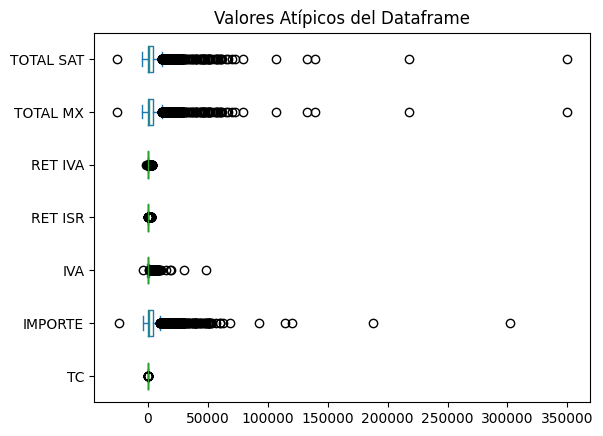

In [300]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gyc21_cuan.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

###**2021"DESVIACIÓN ESTÁNDAR"**

In [301]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=gyc21_cuan
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               6.286851
IMPORTE      36154.569820
IVA           5464.876801
RET ISR        900.150092
RET IVA       1200.884906
TOTAL MX     40680.462408
TOTAL SAT    40671.985064
dtype: float64
Limite inferior permitido TC              -3.981398
IMPORTE     -27625.812771
IVA          -4276.811367
RET ISR       -833.428945
RET IVA      -1053.848939
TOTAL MX    -31176.694132
TOTAL SAT   -31129.503410
dtype: float64


In [302]:
#Encontramos Ouliers del Dataframe
outliers= gyc21_cuan[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,
71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B8AEDE83-CC76-404C-A611-6B5A87BA561F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C16F79B5-FB35-4BFC-AF84-708B24F500BB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
83F82167-0D14-144E-9D76-045C95F25DDD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B1C60AE0-02BC-4A33-9513-A280F72B5D06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255F4A25-5753-4208-8F6B-0B59E5AE4741,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
gyc21_cuan_std= gyc21_cuan[(y<=Limite_Superior)&(y>=Limite_Inferior)]
gyc21_cuan_std

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,
71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,1.0,490.00,78.40,0.0,0.0,568.40,568.40
B8AEDE83-CC76-404C-A611-6B5A87BA561F,1.0,345.00,55.20,0.0,0.0,400.20,400.20
19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
C16F79B5-FB35-4BFC-AF84-708B24F500BB,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
83F82167-0D14-144E-9D76-045C95F25DDD,1.0,0.00,0.00,0.0,0.0,0.00,0.00
B1C60AE0-02BC-4A33-9513-A280F72B5D06,1.0,0.00,0.00,0.0,0.0,0.00,0.00
255F4A25-5753-4208-8F6B-0B59E5AE4741,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04


In [304]:
#Corroboramos valores nulos del dataframe4
valores_nulos=gyc21_cuan_std.isnull().sum()
valores_nulos

TC           24
IMPORTE      43
IVA          38
RET ISR      32
RET IVA      81
TOTAL MX     40
TOTAL SAT    40
dtype: int64

In [305]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_gyc21_cuan=gyc21_cuan_std.copy()
data_clean_gyc21_cuan=data_clean_gyc21_cuan.fillna(0) 
data_clean_gyc21_cuan

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,
71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,1.0,490.00,78.40,0.0,0.0,568.40,568.40
B8AEDE83-CC76-404C-A611-6B5A87BA561F,1.0,345.00,55.20,0.0,0.0,400.20,400.20
19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
C16F79B5-FB35-4BFC-AF84-708B24F500BB,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
83F82167-0D14-144E-9D76-045C95F25DDD,1.0,0.00,0.00,0.0,0.0,0.00,0.00
B1C60AE0-02BC-4A33-9513-A280F72B5D06,1.0,0.00,0.00,0.0,0.0,0.00,0.00
255F4A25-5753-4208-8F6B-0B59E5AE4741,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04


In [306]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean_gyc21_cuan.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

###**2021 "CUANTILES"**

In [307]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=gyc21_cuan

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC               1.0000
IMPORTE      10127.7125
IVA           1381.4750
RET ISR          0.0000
RET IVA          0.0000
TOTAL MX     11580.2750
TOTAL SAT    11456.0225
dtype: float64
Limite inferior permitido TC              1.0000
IMPORTE     -6076.6275
IVA          -828.8850
RET ISR         0.0000
RET IVA         0.0000
TOTAL MX    -6948.1650
TOTAL SAT   -6818.3175
dtype: float64


In [308]:
#Encontramos Outliers del Dataframe
outliers_iqr= gyc21_cuan[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,
71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B8AEDE83-CC76-404C-A611-6B5A87BA561F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C16F79B5-FB35-4BFC-AF84-708B24F500BB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
83F82167-0D14-144E-9D76-045C95F25DDD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B1C60AE0-02BC-4A33-9513-A280F72B5D06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255F4A25-5753-4208-8F6B-0B59E5AE4741,NaN,22826.46,NaN,NaN,NaN,23532.04,23532.04


In [309]:
#Obtenemos datos limpios del Dataframe
gyc21_cuan_iqr= gyc21_cuan[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
gyc21_cuan_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,
71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,1.0,490.00,78.40,0.0,0.0,568.4,568.4
B8AEDE83-CC76-404C-A611-6B5A87BA561F,1.0,345.00,55.20,0.0,0.0,400.2,400.2
19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
C16F79B5-FB35-4BFC-AF84-708B24F500BB,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
...,...,...,...,...,...,...,...
83F82167-0D14-144E-9D76-045C95F25DDD,1.0,0.00,0.00,0.0,0.0,0.0,0.0
B1C60AE0-02BC-4A33-9513-A280F72B5D06,1.0,0.00,0.00,0.0,0.0,0.0,0.0
255F4A25-5753-4208-8F6B-0B59E5AE4741,1.0,NaN,705.58,0.0,0.0,NaN,NaN


In [310]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=gyc21_cuan_iqr.isnull().sum()
valores_nulos

TC            24
IMPORTE      336
IVA          342
RET ISR       56
RET IVA      212
TOTAL MX     347
TOTAL SAT    351
dtype: int64

In [311]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
gyc21_cuan_iqr_clean=gyc21_cuan_iqr.copy()
gyc21_cuan_iqr_clean=gyc21_cuan_iqr_clean.fillna(0) 
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=gyc21_cuan_iqr_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

###**DESCARGA 2021**

In [312]:
std21=pd.merge(gyc21_cuali,data_clean_gyc21_cuan , left_index=True, right_index=True, how='outer')
std21.head()

,FECHA,FOLIO,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,,,,,,,,,,
71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,2021-01-01,0001010100750847116902,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
B8AEDE83-CC76-404C-A611-6B5A87BA561F,2021-01-01,0001010100752163714102,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.2,400.2
19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,2021-01-01,19788,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,2021-01-01,211781,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
C16F79B5-FB35-4BFC-AF84-708B24F500BB,2021-01-01,211782,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3


In [313]:
iqr21=pd.merge(gyc21_cuali,gyc21_cuan_iqr_clean , left_index=True, right_index=True, how='outer')
iqr21.head()

,FECHA,FOLIO,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,,,,,,,,,,
71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,2021-01-01,0001010100750847116902,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
B8AEDE83-CC76-404C-A611-6B5A87BA561F,2021-01-01,0001010100752163714102,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.2,400.2
19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,2021-01-01,19788,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,2021-01-01,211781,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
C16F79B5-FB35-4BFC-AF84-708B24F500BB,2021-01-01,211782,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3


In [314]:
#Convertir DataFrame a CSV
data_clean_gyc21_cuan.to_csv("Datos_limpios21_std.csv")
gyc21_cuan_iqr_clean.to_csv("Datos_limpios21_iqr.csv")

In [315]:
#descargar archivo filtrado en csv  
files.download("Datos_limpios21_std.csv")
files.download("Datos_limpios21_iqr.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **2022**

In [316]:
#Verificamos información del DataFrame
gyc22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2577 entries, 9DA0E63F-1D47-441F-93D7-C2E05AE4D35E to 17178BA2-9CCE-54F8-A4B8-3E5F98D4DB8E
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   RFC          2577 non-null   object        
 3   Proveedor    2577 non-null   object        
 4   TIPO GASTO   2577 non-null   object        
 5   Descripción  2577 non-null   object        
 6   MP           2024 non-null   object        
 7   TC           1941 non-null   float64       
 8   Importe      2577 non-null   float64       
 9   IVA          2577 non-null   float64       
 10  RET ISR      2577 non-null   float64       
 11  RET IVA      2577 non-null   float64       
 12  Otros        0 non-null      float64       
 13  TOTAL MX     2577 non-null   float64       
 14  TOTAL SAT    2577 non-null   float64      

In [317]:
#Corroboramos valores nulos
valores_nulos=gyc22.isnull().sum()
valores_nulos

Fecha             0
Folio           102
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP              553
TC              636
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza          801
dtype: int64

##**PROCEDIMIENTO PARA ELIMINAR VALORES NULOS EN DATAFRAME**

In [318]:
#Realizamos una copia del dataframe
data1=gyc22.copy()
data1[["Folio", "MP","Poliza", "Otros"]]= data1[["Folio","MP", "Poliza", "Otros"]].fillna("--")

In [319]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

Fecha            0
Folio            0
RFC              0
Proveedor        0
TIPO GASTO       0
Descripción      0
MP               0
TC             636
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros            0
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza           0
dtype: int64

In [320]:
#Reemplazamos valores nulos del dataframe con "mean"
data1['TC']=data1['TC'].fillna(round(data1['TC'].mean(),1))
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

Fecha          0
Folio          0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
Otros          0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

##**SEPARAMOS CUALITATIVAS Y CUANTITATIVAS**

In [321]:
data1.columns

Index(['Fecha', 'Folio', 'RFC', 'Proveedor', 'TIPO GASTO', 'Descripción', 'MP',
       'TC', 'Importe', 'IVA', 'RET ISR', 'RET IVA', 'Otros', 'TOTAL MX',
       'TOTAL SAT', 'Tipo', 'Status', 'Poliza'],
      dtype='object')

In [322]:
gyc22_cuali = data1.drop(['Importe', 'IVA', 'RET ISR', 'RET IVA', 'TOTAL MX','TOTAL SAT','TC'], axis=1)
gyc22_cuan = data1.drop(['Fecha', 'Folio', 'RFC', 'Proveedor', 'TIPO GASTO','Descripción','Otros','Tipo', 'Status', 'Poliza', 'MP'], axis=1)

In [323]:
gyc22_cuan

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,
9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
7E00E776-A839-4D57-B291-411109164B2F,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
BB6585C1-3B54-4130-AFD0-1867C3764821,1.0,0.00,0.00,0.0,0.0,0.00,0.00
B5E4B4EB-6C2F-11EC-BB9D-00155D014009,1.0,0.00,0.00,0.0,0.0,0.00,0.00
BB6756D1-6CCD-11EC-947D-00155D014407,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
E90DA089-3C3B-45C8-A19C-B8810D222F60,1.0,0.00,0.00,0.0,0.0,0.00,0.00
D720ED7C-F370-4236-B269-8873ABB78745,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,1.2,0.00,0.00,0.0,0.0,0.00,0.00


In [324]:
gyc22_cuali

,Fecha,Folio,RFC,Proveedor,TIPO GASTO,Descripción,MP,Otros,Tipo,Status,Poliza
UUID,,,,,,,,,,,
9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,2022-01-01,280108,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,--,I,Vigente,PE02-ENE22
7E00E776-A839-4D57-B291-411109164B2F,2022-01-01,280109,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,--,I,Vigente,PE03-ENE22
BB6585C1-3B54-4130-AFD0-1867C3764821,2022-01-01,007817297284,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,--,I,Vigente,--
B5E4B4EB-6C2F-11EC-BB9D-00155D014009,2022-01-01,5595,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,--,--,P,Vigente,--
BB6756D1-6CCD-11EC-947D-00155D014407,2022-01-01,5614,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,--,--,P,Vigente,--
...,...,...,...,...,...,...,...,...,...,...,...
E90DA089-3C3B-45C8-A19C-B8810D222F60,2022-12-01,863376,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,--,I,Vigente,--
D720ED7C-F370-4236-B269-8873ABB78745,2022-12-01,1092957089,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,--,I,Vigente,--
0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,2022-12-01,4,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,--,--,P,Vigente,--


<Figure size 1500x800 with 0 Axes>

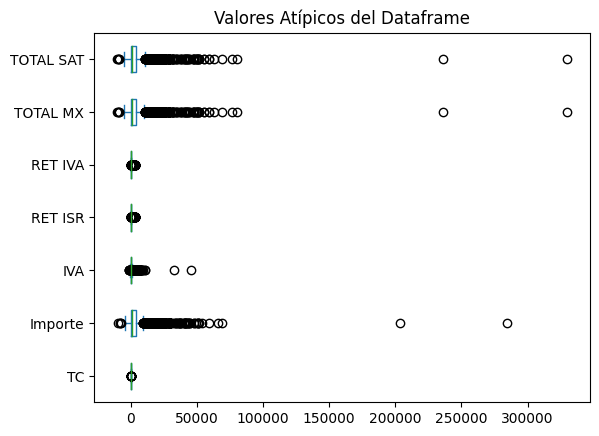

In [325]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gyc22_cuan.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

###**2022"DESVIACIÓN ESTÁNDAR"**

In [326]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=gyc22_cuan
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               5.984644
Importe      34975.501132
IVA           5048.646001
RET ISR        977.619941
RET IVA       1046.847384
TOTAL MX     39054.094273
TOTAL SAT    39095.543969
dtype: float64
Limite inferior permitido TC              -3.617294
Importe     -26990.441616
IVA          -4069.819702
RET ISR       -902.558225
RET IVA       -964.592475
TOTAL MX    -30247.525081
TOTAL SAT   -30172.959879
dtype: float64


In [327]:
#Encontramos Ouliers del Dataframe
outliers= gyc22_cuan[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,
9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7E00E776-A839-4D57-B291-411109164B2F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB6585C1-3B54-4130-AFD0-1867C3764821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B5E4B4EB-6C2F-11EC-BB9D-00155D014009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB6756D1-6CCD-11EC-947D-00155D014407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
E90DA089-3C3B-45C8-A19C-B8810D222F60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D720ED7C-F370-4236-B269-8873ABB78745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
gyc22_cuan_std= gyc22_cuan[(y<=Limite_Superior)&(y>=Limite_Inferior)]
gyc22_cuan_std

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,
9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
7E00E776-A839-4D57-B291-411109164B2F,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
BB6585C1-3B54-4130-AFD0-1867C3764821,1.0,0.00,0.00,0.0,0.0,0.00,0.00
B5E4B4EB-6C2F-11EC-BB9D-00155D014009,1.0,0.00,0.00,0.0,0.0,0.00,0.00
BB6756D1-6CCD-11EC-947D-00155D014407,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
E90DA089-3C3B-45C8-A19C-B8810D222F60,1.0,0.00,0.00,0.0,0.0,0.00,0.00
D720ED7C-F370-4236-B269-8873ABB78745,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,1.2,0.00,0.00,0.0,0.0,0.00,0.00


In [329]:
#Corroboramos valores nulos del dataframe4
valores_nulos=gyc22_cuan_std.isnull().sum()
valores_nulos

TC           18
Importe      36
IVA          31
RET ISR      32
RET IVA      32
TOTAL MX     36
TOTAL SAT    36
dtype: int64

In [330]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_gyc22_cuan=gyc22_cuan_std.copy()
data_clean_gyc22_cuan=data_clean_gyc22_cuan.fillna(0) 
data_clean_gyc22_cuan

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,
9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
7E00E776-A839-4D57-B291-411109164B2F,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
BB6585C1-3B54-4130-AFD0-1867C3764821,1.0,0.00,0.00,0.0,0.0,0.00,0.00
B5E4B4EB-6C2F-11EC-BB9D-00155D014009,1.0,0.00,0.00,0.0,0.0,0.00,0.00
BB6756D1-6CCD-11EC-947D-00155D014407,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
E90DA089-3C3B-45C8-A19C-B8810D222F60,1.0,0.00,0.00,0.0,0.0,0.00,0.00
D720ED7C-F370-4236-B269-8873ABB78745,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,1.2,0.00,0.00,0.0,0.0,0.00,0.00


In [331]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean_gyc22_cuan.isnull().sum()
valores_nulos

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

###**2022 "CUANTILES"**

In [332]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=gyc22_cuan

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC               1.500
Importe       9058.900
IVA           1031.150
RET ISR          0.000
RET IVA          0.000
TOTAL MX     10374.700
TOTAL SAT    10485.475
dtype: float64
Limite inferior permitido TC              0.700
Importe     -5435.340
IVA          -618.690
RET ISR         0.000
RET IVA         0.000
TOTAL MX    -6224.820
TOTAL SAT   -6291.285
dtype: float64


In [333]:
#Encontramos Outliers del Dataframe
outliers_iqr= gyc22_cuan[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,
9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7E00E776-A839-4D57-B291-411109164B2F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB6585C1-3B54-4130-AFD0-1867C3764821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B5E4B4EB-6C2F-11EC-BB9D-00155D014009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB6756D1-6CCD-11EC-947D-00155D014407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
E90DA089-3C3B-45C8-A19C-B8810D222F60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D720ED7C-F370-4236-B269-8873ABB78745,NaN,17310.3,NaN,NaN,NaN,17826.62,17826.62
0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [334]:
#Obtenemos datos limpios del Dataframe
gyc22_cuan_iqr= gyc22_cuan[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
gyc22_cuan_iqr

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,
9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
7E00E776-A839-4D57-B291-411109164B2F,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
BB6585C1-3B54-4130-AFD0-1867C3764821,1.0,0.00,0.00,0.0,0.0,0.0,0.0
B5E4B4EB-6C2F-11EC-BB9D-00155D014009,1.0,0.00,0.00,0.0,0.0,0.0,0.0
BB6756D1-6CCD-11EC-947D-00155D014407,1.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
E90DA089-3C3B-45C8-A19C-B8810D222F60,1.0,0.00,0.00,0.0,0.0,0.0,0.0
D720ED7C-F370-4236-B269-8873ABB78745,1.0,NaN,516.32,0.0,0.0,NaN,NaN
0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,1.2,0.00,0.00,0.0,0.0,0.0,0.0


In [335]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=gyc22_cuan_iqr.isnull().sum()
valores_nulos

TC            18
Importe      305
IVA          303
RET ISR       71
RET IVA       70
TOTAL MX     291
TOTAL SAT    288
dtype: int64

In [336]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
gyc22_cuan_iqr_clean=gyc22_cuan_iqr.copy()
gyc22_cuan_iqr_clean=gyc22_cuan_iqr_clean.fillna(0) 
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=gyc22_cuan_iqr_clean.isnull().sum()
valores_nulos

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

###**DESCARGA 2022**

In [337]:
std22=pd.merge(gyc22_cuali,data_clean_gyc22_cuan , left_index=True, right_index=True, how='outer')
std22.head()

,Fecha,Folio,RFC,Proveedor,TIPO GASTO,Descripción,MP,Otros,Tipo,Status,Poliza,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,,,,,,,,,,,
9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,2022-01-01,280108,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,--,I,Vigente,PE02-ENE22,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
7E00E776-A839-4D57-B291-411109164B2F,2022-01-01,280109,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,--,I,Vigente,PE03-ENE22,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
BB6585C1-3B54-4130-AFD0-1867C3764821,2022-01-01,007817297284,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,--,I,Vigente,--,1.0,0.00,0.00,0.0,0.0,0.0,0.0
B5E4B4EB-6C2F-11EC-BB9D-00155D014009,2022-01-01,5595,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,--,--,P,Vigente,--,1.0,0.00,0.00,0.0,0.0,0.0,0.0
BB6756D1-6CCD-11EC-947D-00155D014407,2022-01-01,5614,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,--,--,P,Vigente,--,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [338]:
iqr22=pd.merge(gyc22_cuali,gyc22_cuan_iqr_clean , left_index=True, right_index=True, how='outer')
iqr22.head()

,Fecha,Folio,RFC,Proveedor,TIPO GASTO,Descripción,MP,Otros,Tipo,Status,Poliza,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,,,,,,,,,,,
9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,2022-01-01,280108,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,--,I,Vigente,PE02-ENE22,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
7E00E776-A839-4D57-B291-411109164B2F,2022-01-01,280109,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,--,I,Vigente,PE03-ENE22,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
BB6585C1-3B54-4130-AFD0-1867C3764821,2022-01-01,007817297284,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,--,I,Vigente,--,1.0,0.00,0.00,0.0,0.0,0.0,0.0
B5E4B4EB-6C2F-11EC-BB9D-00155D014009,2022-01-01,5595,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,--,--,P,Vigente,--,1.0,0.00,0.00,0.0,0.0,0.0,0.0
BB6756D1-6CCD-11EC-947D-00155D014407,2022-01-01,5614,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,--,--,P,Vigente,--,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [339]:
#Convertir DataFrame a CSV
std22.to_csv("Datos_limpios22_std.csv")
iqr22.to_csv("Datos_limpios22_iqr.csv")

In [340]:
#descargar archivo filtrado en csv   
files.download("Datos_limpios22_std.csv")
files.download("Datos_limpios22_iqr.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **2023**

In [341]:
#Verificamos información del DataFrame
gyc23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 49536321-60A4-523E-A32F-E8BDF5C2276E to 439A9230-277E-5563-818C-7630B0E8D706
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   RFC          397 non-null    object        
 3   Proveedor    397 non-null    object        
 4   TIPO GASTO   389 non-null    object        
 5   Descripción  397 non-null    object        
 6   MP           326 non-null    object        
 7   FP           326 non-null    float64       
 8   TC           397 non-null    float64       
 9   Importe      397 non-null    float64       
 10  IVA          397 non-null    float64       
 11  RET ISR      397 non-null    float64       
 12  RET IVA      397 non-null    float64       
 13  Otros        0 non-null      float64       
 14  TOTAL MX     397 non-null    float64       

In [342]:
#Corroboramos valores nulos
valores_nulos=gyc23.isnull().sum()
valores_nulos

Fecha            0
Folio           13
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
FP              71
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         115
dtype: int64

##**PROCEDIMIENTO PARA ELIMINAR VALORES NULOS EN DATAFRAME**

In [343]:
#Realizamos una copia del dataframe
data1=gyc23.copy()
data1[["Folio","MP", "TIPO GASTO", "Poliza", "Otros"]]= data1[["Folio","MP", "TIPO GASTO", "Poliza", "Otros"]].fillna("--")

In [344]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

Fecha           0
Folio           0
RFC             0
Proveedor       0
TIPO GASTO      0
Descripción     0
MP              0
FP             71
TC              0
Importe         0
IVA             0
RET ISR         0
RET IVA         0
Otros           0
TOTAL MX        0
TOTAL SAT       0
Tipo            0
Status          0
Poliza          0
dtype: int64

In [345]:
#Reemplazamos valores nulos del dataframe con "mean"
data1['FP']=data1['FP'].fillna(round(data1['FP'].mean(),1))
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

Fecha          0
Folio          0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
Otros          0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

##**SEPARAMOS CUALITATIVAS Y CUANTITATIVAS**

In [346]:
data1.columns

Index(['Fecha', 'Folio', 'RFC', 'Proveedor', 'TIPO GASTO', 'Descripción', 'MP',
       'FP', 'TC', 'Importe', 'IVA', 'RET ISR', 'RET IVA', 'Otros', 'TOTAL MX',
       'TOTAL SAT', 'Tipo', 'Status', 'Poliza'],
      dtype='object')

In [347]:
gyc23_cuali = data1.drop(['Importe', 'IVA', 'RET ISR', 'RET IVA', 'TOTAL MX','TOTAL SAT','TC', 'FP'], axis=1)
gyc23_cuan = data1.drop(['Fecha', 'Folio', 'RFC', 'Proveedor', 'TIPO GASTO','Descripción','Otros','Tipo', 'Status', 'Poliza', 'MP'], axis=1)

In [348]:
gyc23_cuan

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,
49536321-60A4-523E-A32F-E8BDF5C2276E,44.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
20FBB63B-D550-512F-9668-EEC6F983CEB7,44.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
DB8C4388-D4E0-4F0C-A09C-77C773257F44,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
A81A63F5-D5EC-4601-803E-375AF9CC5021,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
DCC10492-DE51-4C87-8430-5676FBF81931,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
3E97C399-6747-4BCA-8436-ED4B0933DF33,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
B7132758-F800-4797-B1D6-CC61AFFEE444,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92


In [349]:
gyc23_cuali

,Fecha,Folio,RFC,Proveedor,TIPO GASTO,Descripción,MP,Otros,Tipo,Status,Poliza
UUID,,,,,,,,,,,
49536321-60A4-523E-A32F-E8BDF5C2276E,2023-01-01,31,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,--,--,P,Vigente,--
20FBB63B-D550-512F-9668-EEC6F983CEB7,2023-01-01,38,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,--,--,P,Vigente,--
DB8C4388-D4E0-4F0C-A09C-77C773257F44,2023-01-01,341932,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,--,I,Vigente,PE01-ENE23
A81A63F5-D5EC-4601-803E-375AF9CC5021,2023-01-01,341933,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,--,I,Vigente,PE02-ENE23
DCC10492-DE51-4C87-8430-5676FBF81931,2023-01-01,342205,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,--,I,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...
3E97C399-6747-4BCA-8436-ED4B0933DF33,2023-02-01,882974,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,--,I,Vigente,--
B7132758-F800-4797-B1D6-CC61AFFEE444,2023-02-01,053560,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,--,I,Vigente,--
D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,2023-02-01,1092957089,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,--,I,Vigente,--


<Figure size 1500x800 with 0 Axes>

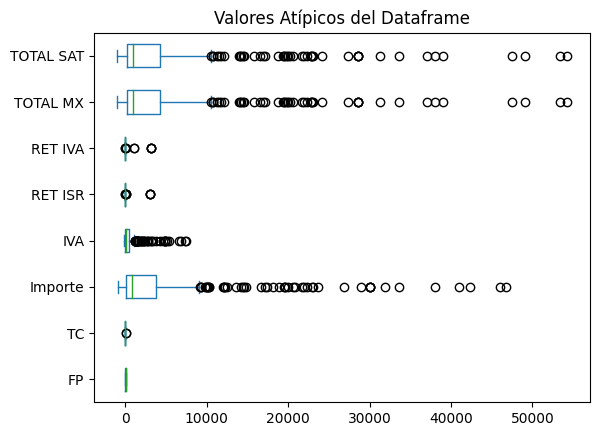

In [350]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gyc23_cuan.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

###**2023"DESVIACIÓN ESTÁNDAR"**

In [351]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=gyc23_cuan
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido FP             173.384206
TC               4.957143
Importe      26557.244156
IVA           3761.774707
RET ISR        931.175004
RET IVA       1022.471745
TOTAL MX     29218.464899
TOTAL SAT    29218.464899
dtype: float64
Limite inferior permitido FP             -85.384206
TC              -2.774030
Importe     -18708.366775
IVA          -2766.954304
RET ISR       -869.142712
RET IVA       -947.124289
TOTAL MX    -20512.146863
TOTAL SAT   -20512.146863
dtype: float64


In [352]:
#Encontramos Ouliers del Dataframe
outliers= gyc23_cuan[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,
49536321-60A4-523E-A32F-E8BDF5C2276E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20FBB63B-D550-512F-9668-EEC6F983CEB7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DB8C4388-D4E0-4F0C-A09C-77C773257F44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A81A63F5-D5EC-4601-803E-375AF9CC5021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DCC10492-DE51-4C87-8430-5676FBF81931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3E97C399-6747-4BCA-8436-ED4B0933DF33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B7132758-F800-4797-B1D6-CC61AFFEE444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [353]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
gyc23_cuan_std= gyc23_cuan[(y<=Limite_Superior)&(y>=Limite_Inferior)]
gyc23_cuan_std

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,
49536321-60A4-523E-A32F-E8BDF5C2276E,44.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
20FBB63B-D550-512F-9668-EEC6F983CEB7,44.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
DB8C4388-D4E0-4F0C-A09C-77C773257F44,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
A81A63F5-D5EC-4601-803E-375AF9CC5021,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
DCC10492-DE51-4C87-8430-5676FBF81931,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
3E97C399-6747-4BCA-8436-ED4B0933DF33,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
B7132758-F800-4797-B1D6-CC61AFFEE444,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92


In [354]:
#Corroboramos valores nulos del dataframe4
valores_nulos=gyc23_cuan_std.isnull().sum()
valores_nulos

FP            0
TC            2
Importe      13
IVA          13
RET ISR       4
RET IVA       6
TOTAL MX      9
TOTAL SAT     9
dtype: int64

In [355]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_gyc23_cuan=gyc23_cuan_std.copy()
data_clean_gyc23_cuan=data_clean_gyc23_cuan.fillna(0) 
data_clean_gyc23_cuan

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,
49536321-60A4-523E-A32F-E8BDF5C2276E,44.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
20FBB63B-D550-512F-9668-EEC6F983CEB7,44.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
DB8C4388-D4E0-4F0C-A09C-77C773257F44,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
A81A63F5-D5EC-4601-803E-375AF9CC5021,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
DCC10492-DE51-4C87-8430-5676FBF81931,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
3E97C399-6747-4BCA-8436-ED4B0933DF33,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
B7132758-F800-4797-B1D6-CC61AFFEE444,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92


In [356]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean_gyc23_cuan.isnull().sum()
valores_nulos

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

###**2023 "CUANTILES"**

In [357]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=gyc23_cuan

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido FP             243.00
TC               1.00
Importe       9075.43
IVA           1120.00
RET ISR          0.00
RET IVA          0.00
TOTAL MX     10527.50
TOTAL SAT    10527.50
dtype: float64
Limite inferior permitido FP           -141.00
TC              1.00
Importe     -5259.05
IVA          -672.00
RET ISR         0.00
RET IVA         0.00
TOTAL MX    -6100.50
TOTAL SAT   -6100.50
dtype: float64


In [358]:
#Encontramos Outliers del Dataframe
outliers_iqr= gyc23_cuan[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,
49536321-60A4-523E-A32F-E8BDF5C2276E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20FBB63B-D550-512F-9668-EEC6F983CEB7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DB8C4388-D4E0-4F0C-A09C-77C773257F44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A81A63F5-D5EC-4601-803E-375AF9CC5021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DCC10492-DE51-4C87-8430-5676FBF81931,NaN,NaN,NaN,1352.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3E97C399-6747-4BCA-8436-ED4B0933DF33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B7132758-F800-4797-B1D6-CC61AFFEE444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,NaN,NaN,18071.52,NaN,NaN,NaN,18753.92,18753.92


In [359]:
#Obtenemos datos limpios del Dataframe
gyc23_cuan_iqr= gyc23_cuan[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
gyc23_cuan_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,
49536321-60A4-523E-A32F-E8BDF5C2276E,44.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
20FBB63B-D550-512F-9668-EEC6F983CEB7,44.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
DB8C4388-D4E0-4F0C-A09C-77C773257F44,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
A81A63F5-D5EC-4601-803E-375AF9CC5021,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
DCC10492-DE51-4C87-8430-5676FBF81931,99.0,1.0,8454.37,NaN,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
3E97C399-6747-4BCA-8436-ED4B0933DF33,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
B7132758-F800-4797-B1D6-CC61AFFEE444,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,3.0,1.0,NaN,682.40,0.0,0.0,NaN,NaN


In [360]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=gyc23_cuan_iqr.isnull().sum()
valores_nulos

FP            0
TC            2
Importe      50
IVA          49
RET ISR       9
RET IVA       9
TOTAL MX     46
TOTAL SAT    46
dtype: int64

In [361]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
gyc23_cuan_iqr_clean=gyc23_cuan_iqr.copy()
gyc23_cuan_iqr_clean=gyc23_cuan_iqr_clean.fillna(0) 
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=gyc23_cuan_iqr_clean.isnull().sum()
valores_nulos

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

###**DESCARGA 2023**

In [362]:
std23=pd.merge(gyc23_cuali,data_clean_gyc23_cuan , left_index=True, right_index=True, how='outer')
std23.head()

,Fecha,Folio,RFC,Proveedor,TIPO GASTO,Descripción,MP,Otros,Tipo,Status,Poliza,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,,,,,,,,,,,,
49536321-60A4-523E-A32F-E8BDF5C2276E,2023-01-01,31,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,--,--,P,Vigente,--,44.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
20FBB63B-D550-512F-9668-EEC6F983CEB7,2023-01-01,38,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,--,--,P,Vigente,--,44.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
DB8C4388-D4E0-4F0C-A09C-77C773257F44,2023-01-01,341932,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,--,I,Vigente,PE01-ENE23,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
A81A63F5-D5EC-4601-803E-375AF9CC5021,2023-01-01,341933,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,--,I,Vigente,PE02-ENE23,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
DCC10492-DE51-4C87-8430-5676FBF81931,2023-01-01,342205,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,--,I,Vigente,PE03-ENE23,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07


In [363]:
iqr23=pd.merge(gyc23_cuali,gyc23_cuan_iqr_clean , left_index=True, right_index=True, how='outer')
iqr23.head()

,Fecha,Folio,RFC,Proveedor,TIPO GASTO,Descripción,MP,Otros,Tipo,Status,Poliza,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
UUID,,,,,,,,,,,,,,,,,,,
49536321-60A4-523E-A32F-E8BDF5C2276E,2023-01-01,31,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,--,--,P,Vigente,--,44.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
20FBB63B-D550-512F-9668-EEC6F983CEB7,2023-01-01,38,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,--,--,P,Vigente,--,44.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
DB8C4388-D4E0-4F0C-A09C-77C773257F44,2023-01-01,341932,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,--,I,Vigente,PE01-ENE23,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
A81A63F5-D5EC-4601-803E-375AF9CC5021,2023-01-01,341933,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,--,I,Vigente,PE02-ENE23,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
DCC10492-DE51-4C87-8430-5676FBF81931,2023-01-01,342205,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,--,I,Vigente,PE03-ENE23,99.0,1.0,8454.37,0.00,0.0,0.0,9807.07,9807.07


In [364]:
#Convertir DataFrame a CSV
std23.to_csv("Datos_limpios23_std.csv")
iqr23.to_csv("Datos_limpios23_iqr.csv")

In [365]:
#descargar archivo filtrado en csv   
files.download("Datos_limpios23_std.csv")
files.download("Datos_limpios23_iqr.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>